In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Importação do csv com o pd.read_csv

In [28]:
df = pd.read_csv("2024_State_Employee_Pay.csv")
df = df.sample(frac=0.1, random_state=10)

In [29]:
df.head()

,Calendar Year,Agency Name,Position Title,Employee Name,YTD Gross Pay
50426,2024,PUBLIC SAFETY,DIRECT CARE AIDE,"MCDONALD, KRISTI L",1826.05
33741,2024,MENTAL HEALTH,DOMESTIC SERVICE WORKER,"CASH, FAITH M.",522.04
28205,2024,JUDICIARY,MITIGATION SPECIALIST,"ROWE, BRITTNEY F",50206.00
52183,2024,PUBLIC SAFETY,MOTOR VEH INSP,"HARRISON, CORY S.",12089.00
7775,2024,CORRECTIONS,CORRECTIONAL OFFICER,"DELLINGER, LORIE L",38290.34


# Preparação

In [30]:
df.columns = ['calendar_year', 'agency_name', 'position_title', 'employee_name', 'ytd_gross_pay']

In [31]:
df.head()

,calendar_year,agency_name,position_title,employee_name,ytd_gross_pay
50426,2024,PUBLIC SAFETY,DIRECT CARE AIDE,"MCDONALD, KRISTI L",1826.05
33741,2024,MENTAL HEALTH,DOMESTIC SERVICE WORKER,"CASH, FAITH M.",522.04
28205,2024,JUDICIARY,MITIGATION SPECIALIST,"ROWE, BRITTNEY F",50206.00
52183,2024,PUBLIC SAFETY,MOTOR VEH INSP,"HARRISON, CORY S.",12089.00
7775,2024,CORRECTIONS,CORRECTIONAL OFFICER,"DELLINGER, LORIE L",38290.34


In [32]:
df.shape[0]

7287

## Transformação e Normalização

In [33]:
df.drop('employee_name', axis=1, inplace=True)

label_encoder = LabelEncoder()

categorical_features = ['calendar_year', 'agency_name', 'position_title']
continuous_features = ['ytd_gross_pay']

for col in categorical_features:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)
df.head()

,ytd_gross_pay,calendar_year_2024,agency_name_AGRICULTURE,agency_name_COMMERCE AND INSURANCE,agency_name_CONSERVATION,agency_name_CORRECTIONS,agency_name_ECONOMIC DEVELOPMENT,agency_name_ELEMENTARY AND SECONDARY EDUCATION,agency_name_HEALTH AND SENIOR SERVICES,agency_name_HIGHER EDUCATION AND WORKFORCE DEV,...,position_title_WEB DEVELOPER,position_title_WILDLIFE BIOLOGIST,position_title_WILDLIFE BIOLOGIST ASSISTANT,position_title_WILDLIFE DAMAGE BIOLOGIST,position_title_WILDLIFE MGMT COORDINATOR,position_title_YOUTH SERVICES COORDINATOR,position_title_YOUTH SERVICES MANAGER,position_title_YOUTH SERVICES WORKER,position_title_YTH SVCS SPECIALIST,position_title_YTH SVCS SUPERVISOR
50426,1826.05,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33741,522.04,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28205,50206.00,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52183,12089.00,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7775,38290.34,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
mms = MinMaxScaler()

df['ytd_gross_pay'] = mms.fit_transform(df['ytd_gross_pay'].values.reshape(-1, 1))

df.head()

,ytd_gross_pay,calendar_year_2024,agency_name_AGRICULTURE,agency_name_COMMERCE AND INSURANCE,agency_name_CONSERVATION,agency_name_CORRECTIONS,agency_name_ECONOMIC DEVELOPMENT,agency_name_ELEMENTARY AND SECONDARY EDUCATION,agency_name_HEALTH AND SENIOR SERVICES,agency_name_HIGHER EDUCATION AND WORKFORCE DEV,...,position_title_WEB DEVELOPER,position_title_WILDLIFE BIOLOGIST,position_title_WILDLIFE BIOLOGIST ASSISTANT,position_title_WILDLIFE DAMAGE BIOLOGIST,position_title_WILDLIFE MGMT COORDINATOR,position_title_YOUTH SERVICES COORDINATOR,position_title_YOUTH SERVICES MANAGER,position_title_YOUTH SERVICES WORKER,position_title_YTH SVCS SPECIALIST,position_title_YTH SVCS SUPERVISOR
50426,0.003891,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33741,0.001335,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28205,0.098737,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52183,0.024011,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7775,0.075377,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Análise

## Intervalo

In [35]:
K = range(1,15)

## Aplicação do Kmeans

In [36]:
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k,n_init=10)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
    # print(km.inertia_)

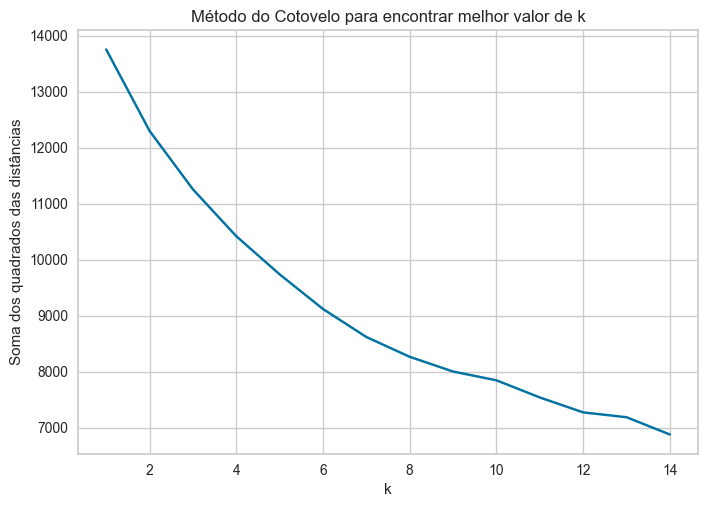

In [37]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do Cotovelo para encontrar melhor valor de k')
plt.show()

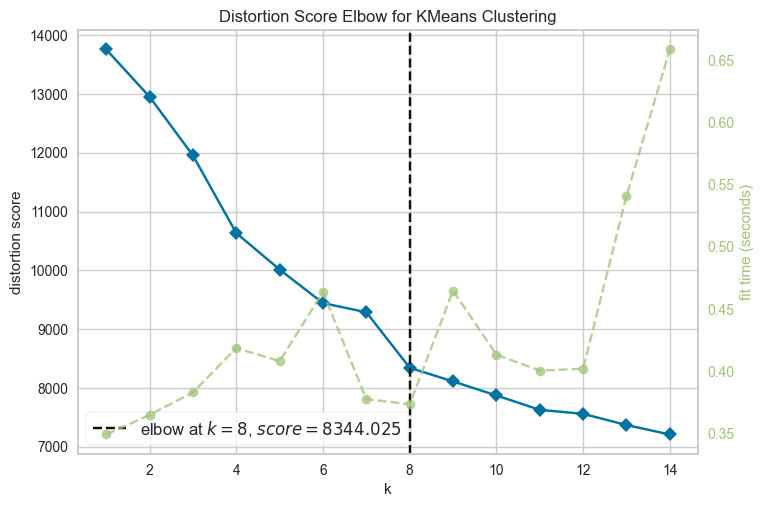

In [38]:
from yellowbrick.cluster import KElbowVisualizer
#km_transformed = mms.transform(km)
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,15))
visualizer.fit(df)
visualizer.show();